<a href="https://colab.research.google.com/github/Salsabilaurelia1408/tugasakhirsalsa/blob/main/Tuning_Dropout(Short_ver)_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
# Reshape data to fit the input shape of the models
def reshape_data(X,Y, look_back=1):
    dataX = []
    dataY = []
    '''
    for i in range(look_back, len(Data)):
        X.append(data[i-look_back:i, :])
        Y.append(data[i, 0])
    '''
    for i in range(len(X) - look_back):
        a = X[i:(i + look_back), :]
        b = Y[i + look_back, :]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

def create_GRU_model(look_back, dropout):
    model = Sequential()
    model.add(GRU(512, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.add(Dropout(dropout))
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# Load data
url = 'https://raw.githubusercontent.com/Salsabilaurelia1408/tugasakhirsalsa/main/WOPR2_DateFormatRevised.csv'
df = pd.read_csv(url, index_col='Time', parse_dates=True)
df.set_index('Date', inplace=True)
df.index.freq = 'MS'

# Define input and output variables
X = df[['WBHP']]
Y = df['WOPR']

Epoch 1/50
7/7 [==============================] - 3s 169ms/step - loss: 0.2565 - val_loss: 0.0140
Epoch 2/50
7/7 [==============================] - 1s 127ms/step - loss: 0.1494 - val_loss: 0.0234
Epoch 3/50
7/7 [==============================] - 1s 122ms/step - loss: 0.0861 - val_loss: 0.0152
Epoch 4/50
7/7 [==============================] - 1s 127ms/step - loss: 0.1155 - val_loss: 0.0149
Epoch 5/50
7/7 [==============================] - 1s 121ms/step - loss: 0.1174 - val_loss: 0.0147
Epoch 6/50
7/7 [==============================] - 1s 124ms/step - loss: 0.1098 - val_loss: 0.0161
Epoch 7/50
7/7 [==============================] - 1s 122ms/step - loss: 0.0998 - val_loss: 0.0150
Epoch 8/50
7/7 [==============================] - 1s 195ms/step - loss: 0.1018 - val_loss: 0.0152
Epoch 9/50
7/7 [==============================] - 1s 199ms/step - loss: 0.1088 - val_loss: 0.0159
Epoch 10/50
7/7 [==============================] - 1s 145ms/step - loss: 0.1095 - val_loss: 0.0165
Epoch 11/50
7/7 [==

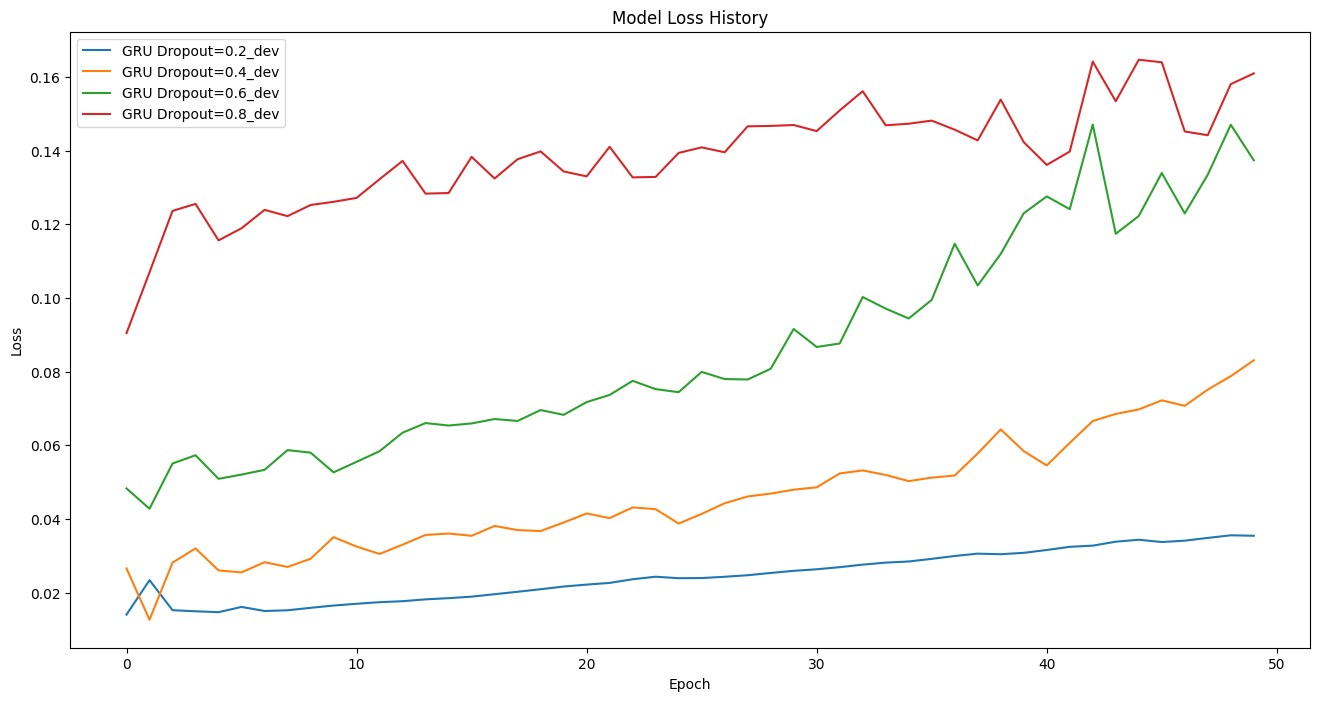

In [ ]:
'''
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(np.array(Y).reshape(-1, 1))

look_back = 15
# Reshape the data
X_reshaped, Y_reshaped = reshape_data(X_scaled, look_back)
    
# Split the data into train, development, and test sets (with shuffle=False)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_reshaped, Y_reshaped, test_size=0.3, shuffle=False)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_dev, Y_dev, test_size=0.5, shuffle=False)


# Define training and testing data
train_size = int(len(df) * 0.7)  # 80% for training, 20% for testing
dev_size = int(len(df)*0.15)
test_size = int(len(df)-(train_size+dev_size))

# Define training and testing data
look_back = 5
X_train = X_scaled[:train_size]
Y_train = Y_scaled[look_back:train_size + look_back]
X_dev = X_scaled[train_size:train_size + dev_size]
Y_dev = Y_scaled[train_size + look_back:train_size + dev_size + look_back]
X_test = X_scaled[train_size + dev_size:]
Y_test = Y_scaled[train_size + dev_size + look_back:]

X_train, Y_train = reshape_data(X_train, look_back)
X_dev, Y_dev = reshape_data(X_dev, look_back)
X_test, Y_test = reshape_data(X_test, look_back)
'''
test_fraction = 0.15
X_traindev_raw, X_test_raw, Y_traindev_raw, Y_test_raw = train_test_split(X, Y, test_size=test_fraction, shuffle=False)
dev_fraction = 0.15
X_train_raw, X_dev_raw, Y_train_raw, Y_dev_raw = train_test_split(X_traindev_raw, Y_traindev_raw, test_size=dev_fraction/(1-test_fraction), shuffle=False)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_raw)
X_dev_scaled = scaler.fit_transform(X_dev_raw)
X_test_scaled = scaler.fit_transform(X_test_raw)

Y_train_scaled = scaler.fit_transform(np.array(Y_train_raw).reshape(-1,1))
Y_dev_scaled = scaler.fit_transform(np.array(Y_dev_raw).reshape(-1,1))
Y_test_scaled = scaler.fit_transform(np.array(Y_test_raw).reshape(-1,1))

X_train, Y_train = reshape_data(X_train_scaled, Y_train_scaled, look_back=10)
X_dev, Y_dev = reshape_data(X_dev_scaled, Y_dev_scaled, look_back=10)
X_test, Y_test = reshape_data(X_test_scaled, Y_test_scaled, look_back=10)


dropout_values = [0.2, 0.4, 0.6, 0.8]
model_loss = []
model_loss_dev = []
model_loss_train = []

plt.figure(figsize=(16,8))
for dropout in dropout_values:
    model = create_GRU_model(10, dropout)
    history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_dev, Y_dev), verbose=1, shuffle=False)
    loss = model.evaluate(X_test, Y_test, verbose=1)
    loss_dev = model.evaluate(X_dev, Y_dev, verbose=1)
    loss_train = model.evaluate(X_train, Y_train, verbose=1)
    model_loss.append(loss)
    model_loss_dev.append(loss_dev)
    model_loss_train.append(loss_train)
    
    # Print the loss value
    print(f"GRU Dropout={dropout}: Loss={loss}, Loss_dev={loss_dev}, Loss_train={loss_train}")

    # Plot the loss history of each model
    '''
    plt.plot(history.history['loss'], label=f"GRU Dropout={dropout}")
    '''
    plt.plot(history.history['val_loss'], label=f"GRU Dropout={dropout}_dev")
    '''
    plt.plot(history.history['loss'], label=f"GRU Dropout={dropout}_train")
    '''

plt.title('Model Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()